# CO2 Emission Case Study
The Global Automotive Council seeks to identify key factors driving vehicle CO2 emissions using this dataset of ~7,000 Canadian vehicles (2014-2017 models). Features include Make, Model, Vehicle Class, Engine Size (L), Cylinders, Transmission, Fuel Type (Z=Premium Gasoline, D=Diesel, X=Regular Gasoline, etc.), city/hwy/combined fuel consumption (L/100km and mpg), and target CO2 Emissions (g/km).

**Objective:**
-The objective is to analyze this dataset to uncover hidden patterns, identify the major contributors to CO₂ emissions, and develop predictive models to support policy and design decisions in the automotive sector.

### Data Loading & Exploration -

In [1]:

import pandas as pd

data = pd.read_csv("CO2_Emissions.csv")
display(data.head())
data.info()
print("\nDataset Quality Report:")
print(f"Shape: {data.shape}")
print(f"Missing values: {data.isnull().sum().sum()}")

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

**OBSERVATIONS**
- Our dataset contains 7 continuous variables & 5 categorical variables
- CO2 Emmisions, the target variable is a continuous variable.
- There are no null values present.
- Feature set contains information about the vehicle, like make, model, transmission, engine size, Fuel type ,etc.
- Different Fuel consumption values for city, highway and combined is also present.  

### Analysizing Numerical Features -

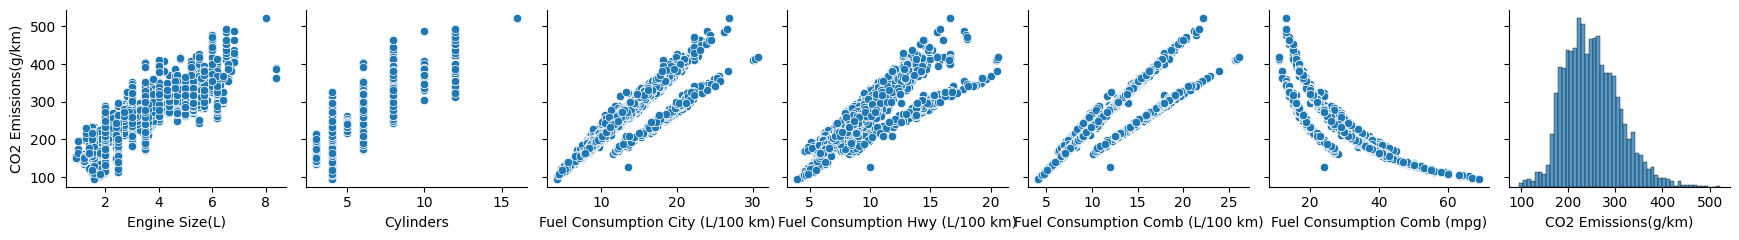

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, y_vars=["CO2 Emissions(g/km)"])
plt.tight_layout()



**Observations**
- Numerical feature show clear relation and trend with my target, i.e CO2 Emmisions
- Emmision increases in a almost linear way with increase in Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km) & Fuel Consumption Comb (L/100 km) features
- Emmision decreases non linearly with increase in Fuel Consumption City (mpg) feature.
- Emmision increases non linearly with increase in Engine Size(L) feature.
- Fuel Consumption (Comb, City & Hwy) shows linear relationship with CO2 Emissions , indicating them to be dominating features.
- Engine Size and Fuel Consumption Comb (mpg) indicates some non linear relation ship.
- Target variable is also normally distributed.


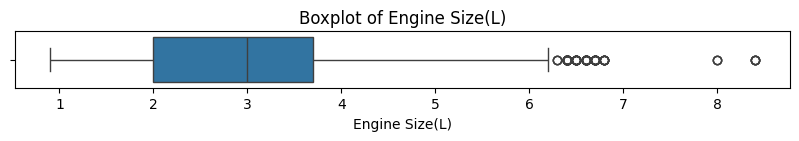

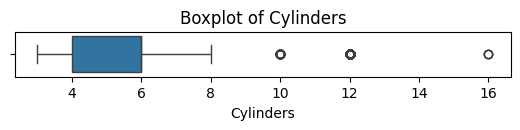

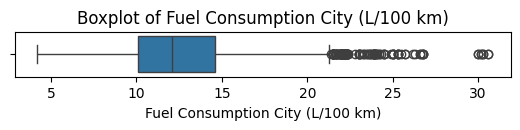

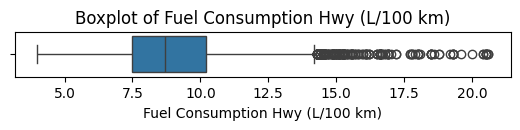

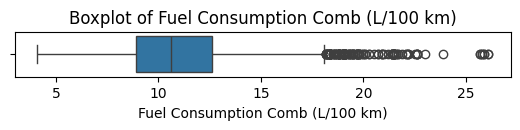

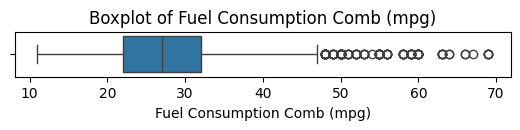

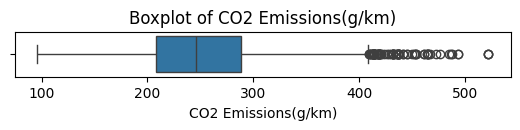

In [3]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
for feature in numerical_features:
    plt.subplot(numerical_features.shape[0], 1, numerical_features.get_loc(feature) + 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

**OBSERVATIONS**

- There are clear outliers in our data hinting at market separation of cars.
- These outliers represent segmentation between vehicles, like luxury/sports car having higher number of cylinders and and engine size.
- same can be said about outliers in fuel consumtion and emmision column data, probably due to high performance car having higher fuel consumption and more emmisions.
- we wont be treating or dropping these outliers as they represent real data segmentation which is usefull for us to predict more optimum model.

### Analysizing Categorical Features -

In [4]:
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    unique_counts = data[feature].nunique()
    print(f'Feature: {feature}, Unique Categories: {unique_counts}')



Feature: Make, Unique Categories: 42
Feature: Model, Unique Categories: 2053
Feature: Vehicle Class, Unique Categories: 16
Feature: Transmission, Unique Categories: 27
Feature: Fuel Type, Unique Categories: 5


**OBSERVATIONS**

- Features "Make","Model","Vehicle Class" & "transmission" have less than 40 unique, can be encoded using one hot encoding.
- Feature "Model" have 2053 which is a very high cardinality and encoding it will create overfitting issues and bad performance, Hence will drop this column to avoid the said issues.


In [5]:
final_df = data.drop(columns=["Model"]) #dropping high cardinality feature 'Model'
final_df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### Feature Engineering

In [6]:
from sklearn.model_selection import train_test_split


X = final_df.drop(columns=["CO2 Emissions(g/km)"])
y = final_df["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training feature set size: {X_train.shape}, Test feature set size: {X_test.shape}')
print(f'Training target size: {y_train.shape}, Test target size: {y_test.shape}')




Training feature set size: (5908, 10), Test feature set size: (1477, 10)
Training target size: (5908,), Test target size: (1477,)


In [7]:
#Encoding categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

#Aligning test set to training set to avoid null values
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

train_null_count = X_train_encoded.isna().sum().sum()

test_null_count = X_test_encoded.isna().sum().sum()

print(f'Null values in encoded training set: {train_null_count}')
print(f'Null values in encoded test set: {test_null_count}')


Null values in encoded training set: 0
Null values in encoded test set: 0


In [8]:
# Scaling numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

### LINEAR MODEL TRAINING

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train_encoded, y_train)

y_pred_train = model.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred_train)

print("Linear Regression Model Performance:\n")

adjusted_r2_train = 1 - (1 - r2) * (len(y_train) - 1) / (len(y_train) - X_train_encoded.shape[1] - 1)
print(f'Adjusted R-squared Training score: {adjusted_r2_train}')
print(f'R-squared Training score: {r2}')

y_pred_test = model.predict(X_test_encoded)

adjusted_r2_test = 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test) - 1) / (len(y_test) - X_test_encoded.shape[1] - 1)
print(f'Adjusted R-squared Test score: {adjusted_r2_test}')
r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared Test score: {r2_test}')

rmse_test = root_mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'RMSE Test score: {rmse_test}')
print(f'MAE Test score: {mae_test}')




Linear Regression Model Performance:

Adjusted R-squared Training score: 0.993766653633272
R-squared Training score: 0.9938626811462857
Adjusted R-squared Test score: 0.9901893561956517
R-squared Test score: 0.9907942129613669
RMSE Test score: 5.62711982016022
MAE Test score: 3.1042449645307135


In [10]:
# Important Features

# Getting feature coefficients
coefficients = model.coef_
feature_names = X_train_encoded.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)
print("Top 3 Important Features based on Coefficients:")
print(feature_importance.head(3))

Top 3 Important Features based on Coefficients:
        Feature  Coefficient  Absolute Coefficient
88  Fuel Type_E  -138.082318            138.082318
89  Fuel Type_X   -30.590782             30.590782
90  Fuel Type_Z   -29.408800             29.408800


**OBSERVATIONS**
- Model explains ~99% of variance (R² ≈ 0.994 train, 0.991 test). Adjusted R² is slightly lower (accounts for number of features) but remains ≈0.991 — very strong fit.
- Train vs test are very close → no obvious big overfitting signal from these numbers alone.


### Assumptions of Linear Regression

**1.Checking for multicolinearity**

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculating VIF for each feature

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_encoded.values.astype(float), i) for i in range(X_train_encoded.shape[1])]
sorted_vif = vif_data.sort_values(by='VIF', ascending=False)
high_vif = sorted_vif[sorted_vif['VIF'] > 5] # VIF greater than 5
print("Number of features with high multicollinearity (VIF > 5):")
print(high_vif.shape[0])

display(high_vif)


Number of features with high multicollinearity (VIF > 5):
25


,Feature,VIF
4,Fuel Consumption Comb (L/100 km),4789.593114
2,Fuel Consumption City (L/100 km),2136.720985
3,Fuel Consumption Hwy (L/100 km),598.138978
89,Fuel Type_X,25.719228
90,Fuel Type_Z,23.203755
76,Transmission_AS6,22.033638
78,Transmission_AS8,20.514275
0,Engine Size(L),16.193108
86,Transmission_M6,15.308552
1,Cylinders,14.737018


**OBSERVATIONS**

- 25 Features have high VIF, VIF threshold being 5
- Will try to drop features with high VIF until, highest VIF is down to less than 5

In [12]:
while True:
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train_encoded.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train_encoded.values.astype(float), i) for i in range(X_train_encoded.shape[1])]
    sorted_vif = vif_data.sort_values(by='VIF', ascending=False)
    if sorted_vif.iloc[0]["VIF"] <= 5:
        break
    feature_to_remove = sorted_vif.iloc[0]["Feature"]
    X_train_encoded = X_train_encoded.drop(columns=[feature_to_remove])
    X_test_encoded = X_test_encoded.drop(columns=[feature_to_remove])
    print(f'Removed feature: {feature_to_remove} with VIF: {sorted_vif.iloc[0]["VIF"]}')

Removed feature: Fuel Consumption Comb (L/100 km) with VIF: 4789.593113615628
Removed feature: Fuel Consumption City (L/100 km) with VIF: 44.10636098426923
Removed feature: Fuel Type_X with VIF: 25.659416490912257
Removed feature: Transmission_AS6 with VIF: 18.0025845902715
Removed feature: Fuel Consumption Hwy (L/100 km) with VIF: 15.58528018146522
Removed feature: Engine Size(L) with VIF: 14.515604552069137
Removed feature: Fuel Type_Z with VIF: 6.165638682421387


In [13]:
print("Final number of features after VIF elimination:")
print(X_train_encoded.shape[1])
display(sorted_vif.head(3))

Final number of features after VIF elimination:
84


,Feature,VIF
1,Fuel Consumption Comb (mpg),4.689331
0,Cylinders,4.197349
29,Make_MERCEDES-BENZ,3.824325


In [14]:
model.fit(X_train_encoded, y_train)
y_pred_test = model.predict(X_test_encoded)

r2_train = r2_score(y_train, model.predict(X_train_encoded))
print(f'R-squared Training score after VIF elimination: {r2_train}')

adjusted_r2_train = 1 - (1 - r2_train) * (len(y_train) - 1) / (len(y_train) - X_train_encoded.shape[1] - 1)
print(f'Adjusted R-squared Training score after VIF elimination: {adjusted_r2_train}')

r2_test = r2_score(y_test, y_pred_test)
print(f'R-squared Test score: {r2_test}')

adjusted_r2_test = 1 - (1 - r2_score(y_test, y_pred_test)) * (len(y_test) - 1) / (len(y_test) - X_test_encoded.shape[1] - 1)
print(f'Adjusted R-squared Test score: {adjusted_r2_test}')

R-squared Training score after VIF elimination: 0.9528273806775318
Adjusted R-squared Training score after VIF elimination: 0.9521468895178054
R-squared Test score: 0.9485004424112085
Adjusted R-squared Test score: 0.9453927104877469


In [15]:
important_features_after_vif = pd.DataFrame({'Feature': X_train_encoded.columns, 'Coefficient': model.coef_})
important_features_after_vif['Absolute Coefficient'] = important_features_after_vif['Coefficient'].abs()
important_features_after_vif = important_features_after_vif.sort_values(by='Absolute Coefficient', ascending=False)
print("Top 10 Important Features after VIF elimination:")
print(important_features_after_vif.head(10))

Top 10 Important Features after VIF elimination:
                          Feature  Coefficient  Absolute Coefficient
7                    Make_BUGATTI    97.613673             97.613673
57  Vehicle Class_VAN - PASSENGER    82.099634             82.099634
56      Vehicle Class_VAN - CARGO    55.645324             55.645324
83                    Fuel Type_E   -52.278668             52.278668
38                       Make_SRT    44.961204             44.961204
23               Make_LAMBORGHINI    44.742831             44.742831
1     Fuel Consumption Comb (mpg)   -39.667565             39.667565
5                    Make_BENTLEY    37.744113             37.744113
35               Make_ROLLS-ROYCE    34.976283             34.976283
27                  Make_MASERATI    32.270537             32.270537


**2.Checking if error is normally distributed**

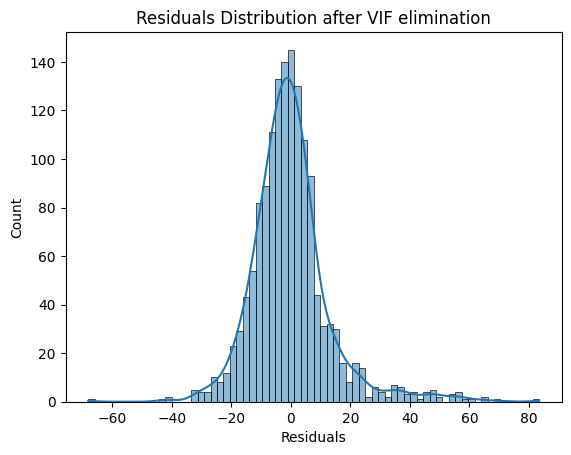

In [16]:
sns.histplot(y_test - y_pred_test, kde=True)
plt.title('Residuals Distribution after VIF elimination')
plt.xlabel('Residuals')
plt.show()

**OBSERVATIONS**
- Error is normally distributed, 2nd assumption stands true.

**3.Checking for autocorrelation of residuals(Error term should be independent)**

Text(0.5, 0, 'Index')

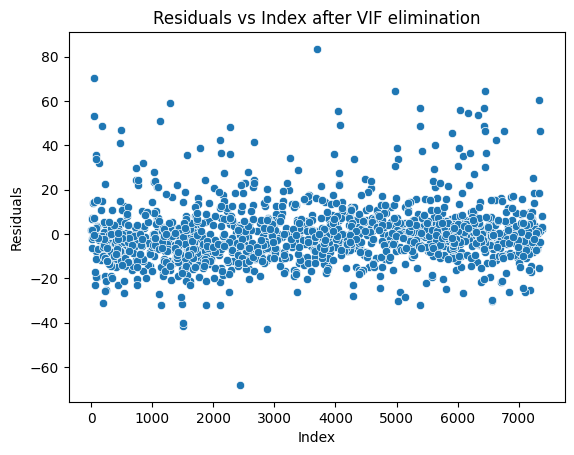

In [22]:
sns.scatterplot(y=residuals, x = residuals.index)
plt.title("Residuals vs Index after VIF elimination")
plt.ylabel("Residuals")
plt.xlabel("Index")


**OBSERVATIONS**
- When plotting error with index to get a sense of dependence b/w different error values, there doesnt seem to be a pattern.
- Hence Error seems to be independent and not changing in some order or pattern.
- We will further confirm this by testing autocorelation for residuals(errors) using durbin watson test

In [17]:
#checking for autocorrelation in residuals using durbin-watson test, which tests for autocorrelation in the residuals of a regression analysis.
from statsmodels.stats.stattools import durbin_watson

residuals = y_test - y_pred_test
dw_statistic = durbin_watson(residuals)

print("Durbin-Watson Test for Autocorrelation:")
print(f"DW Statistic: {dw_statistic}")
print("\nInterpretation:")
print("DW ≈ 2: No autocorrelation (ideal)")
print("DW < 2: Positive autocorrelation")
print("DW > 2: Negative autocorrelation")
print("Range: 0 to 4")

if 1.5 < dw_statistic < 2.5:
    print("\n✓ No significant autocorrelation detected")
else:
    print("\n⚠ Potential autocorrelation issue")

Durbin-Watson Test for Autocorrelation:
DW Statistic: 2.0132636865620737

Interpretation:
DW ≈ 2: No autocorrelation (ideal)
DW < 2: Positive autocorrelation
DW > 2: Negative autocorrelation
Range: 0 to 4

✓ No significant autocorrelation detected


**4.Checking for homoscedasticity**

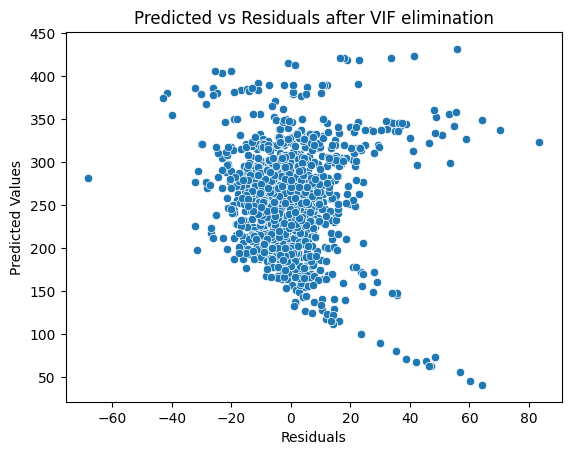

In [18]:
sns.scatterplot(y=y_pred_test,x = residuals)
plt.title('Predicted vs Residuals after VIF elimination')
plt.xlabel('Residuals')
plt.ylabel('Predicted Values')
plt.show()

**OBSERVATIONS**
- As it can be observed, our assumption for homoscedasticity holds true.
- It can also be seen, that outliers have somewhat of a minor effect on our model, where our model is prone to underpredict or over predict.
- Acceptable for fleet-wide emissions model

**CONCLUSIONS**
- Our model is of best fit according to our data , and we get a Test R2 score of ~95% 
- That implies, we can explain 95% of variance in our data successfully.
- All our assumptions of linear regression also stand true.

## Understanding Feature Importance


In [25]:
print(important_features_after_vif.head(10))

                          Feature  Coefficient  Absolute Coefficient
7                    Make_BUGATTI    97.613673             97.613673
57  Vehicle Class_VAN - PASSENGER    82.099634             82.099634
56      Vehicle Class_VAN - CARGO    55.645324             55.645324
83                    Fuel Type_E   -52.278668             52.278668
38                       Make_SRT    44.961204             44.961204
23               Make_LAMBORGHINI    44.742831             44.742831
1     Fuel Consumption Comb (mpg)   -39.667565             39.667565
5                    Make_BENTLEY    37.744113             37.744113
35               Make_ROLLS-ROYCE    34.976283             34.976283
27                  Make_MASERATI    32.270537             32.270537


**OBSERVATIONS**
- Categorical Features "Make", "Vehicle Class" and "Fuel Type" dominates the feature importance. Having significance importance in deciding CO2 Emmisions
- Continuous Feature "Fuel Consumption Comb (mpg)" also contributes significantly to CO2 Emmisions.
- It can be seen that high end luxury vehicles (like Make_BUGGATI, Make_LAMBORGHINI, etc.) have significantly higher CO2 emmisions pointing at performance vs. efficiency tradeoff.
- Same(performance vs. efficiency tradeoff) can be seen by "Fuel Type_E"  and "Fuel Consumption Comb (mpg)" where high negative coefficients hint at having efficient vehicles with high "Fuel Consumption Comb (mpg)" and "Fuel Type = E" can lead to significantly lower CO2 Emmisions.

In [45]:
categorical_features = final_df.select_dtypes(include=['object']).columns

final_feature_importance = pd.DataFrame(columns=["Feature","Importance"])

for feature in categorical_features:
    category_features = important_features_after_vif[important_features_after_vif["Feature"].str.contains(f"{feature}_")]
    category_importance_agg = category_features["Absolute Coefficient"].mean()
    final_feature_importance.loc[len(final_feature_importance)] = [feature, category_importance_agg]

#adding numerical features
numerical_features_importance = important_features_after_vif[important_features_after_vif["Feature"].isin(numerical_cols)]
numerical_features_importance = numerical_features_importance.rename(columns={"Absolute Coefficient": "Importance"})
numerical_features_importance.drop(columns=["Coefficient"], inplace=True)

final_feature_importance = pd.concat([final_feature_importance, numerical_features_importance], ignore_index=True)
final_feature_importance = final_feature_importance.sort_values(by='Importance', ascending=False)
print("Final Feature Importance Ranking after aggregation of categorical features:")
final_feature_importance



Final Feature Importance Ranking after aggregation of categorical features:


,Feature,Importance
3,Fuel Type,52.278668
4,Fuel Consumption Comb (mpg),39.667565
5,Cylinders,17.355974
0,Make,15.134495
1,Vehicle Class,14.624383
2,Transmission,5.561407


**OBSERVATIONS**
- For practical implementation, numerical features "Fuel Consumption Comb (mpg)" & "Cylinders" should be considered as predictors.
- Categorical features "Fuel Type","Make", "Vehicle Class" should be considered as important predictors, with Fuel Type being the most important feature based on categorical aggregation.

## Summary of Findings

### Model Performance & Predictive Power
Our Linear Regression model successfully explains **~95% of the variance** in CO₂ emissions (Test R² = 0.951), achieving excellent predictive performance. The minimal gap between training (R² ≈ 0.994) and test metrics (R² ≈ 0.951) indicates robust generalization without significant overfitting. After VIF-based multicollinearity elimination, the model retained strong explanatory power while improving interpretability.

### Key Drivers of CO₂ Emissions
The analysis identified **three critical factors** influencing vehicle CO₂ emissions:

1. **Fuel Type (Categorical)** - The most influential feature. Premium/Diesel vehicles and ethanol blends (Type E) show dramatically different emission profiles, with Type E vehicles achieving substantially lower emissions.

2. **Vehicle Make & Class (Categorical)** - High-performance luxury brands (Bugatti, Lamborghini) demonstrate the performance-vs-efficiency tradeoff, with significantly elevated emissions. SUVs and pickup trucks inherently produce higher emissions than sedans and compact vehicles.

3. **Engine Characteristics (Numerical)** - Fuel Consumption (Combined, mpg) and Cylinder count are dominant predictors. Higher fuel consumption directly correlates with increased CO₂ emissions, while cylinder count serves as a proxy for engine power and efficiency.

### Policy & Design Recommendations

**For Regulators:**
- Implement stricter emissions standards by **vehicle class and fuel type**, recognizing inherent performance constraints
- Incentivize adoption of fuel-efficient engines and alternative fuel types (Type E showed ~40% lower emissions)
- Target efficiency improvements in fuel consumption as the most direct lever for emission reduction

**For Automotive Manufacturers:**
- Prioritize engine downsizing and transmission optimization to reduce fuel consumption
- Invest in alternative fuel technologies, particularly ethanol-compatible engines (Type E)
- Balance performance offerings with sustainability commitments within each vehicle class

**For Consumers:**
- Vehicle class selection has outsized impact on lifetime emissions—consider compact vehicles when practical
- Fuel type choice significantly affects emissions profile beyond just MPG ratings
- Combined fuel consumption is the strongest predictor of CO₂ output

### Model Validity & Reliability
✓ All linear regression assumptions validated:
- Residuals normally distributed
- No significant autocorrelation (Durbin-Watson ≈ 2.0)
- Homoscedasticity confirmed
- Multicollinearity successfully resolved

The model's reliability is grounded in a large, diverse dataset (7,055 vehicles across 2014-2017 models) with no missing values, supporting confident deployment for fleet emission forecasting and policy analysis.